# __Primeiros Passos no Aprendizado Profundo__
<font size=3>

Neste minicurso teremos uma imersão prática e teórica na modelagem de redes neurais artificiais como abordagem para soluções de tarefas de Aprendizado de Máquina. 

Aqui, iremos aprender:
- Do que se tratam as redes neurais artificiais;
- Funções de ativação;
- Funções de perda;
- Métodos treinamentos das redes.


## __1. Do que se trada o Aprendizado Profundo?__
<font size=3>
    
O que é o __Aprendizado Profundo__ (_Deep Learning_), de fato? Para entender, vamos começar pelo conceito mais amplo de [Inteligência Artificial (IA)](https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial), que se trata de uma área da _Ciência da Computação_ dedicada ao desenvolvimento de sistemas e algoritmos capazes de realizar tarefas que normalmente requerem inteligência humana, como reconhecimento de padrões, tomada de decisão, resolução de problemas e aprendizado a partir de dados.

Dentro desse campo, o [Aprendizado de Máquina](https://pt.wikipedia.org/wiki/Aprendizado_de_m%C3%A1quina) (_Machine Learning_ $-$ ML) é uma abordagem da IA que utiliza conjuntos de dados para "aprender" suas características ou padrões e executar tarefas. Entre os métodos utilizados no ML estão o [classificador Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier), [Random Forest](https://en.wikipedia.org/wiki/Random_forest), [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN), e [Redes Neurais Artificiais](https://pt.wikipedia.org/wiki/Rede_neural_artificial) (_Artificial Neural Network_ - ANN).


Esta última abordagem se baseia na modelagem matemática de _redes neurais biológicas_, onde a ativação de neurônios _artificiais_ cria uma "caminho" entre os dados de entrada e a saída do modelo da rede. Modelos com apenas uma camada de neurônios são chamados de modelos de Aprendizado Raso (_Shallow Learning_). Já os modelos com múltiplas camadas entre os dados de entrada e saída codificam os padrões dos dados com maior detalhe e profundidade durante o treinamento. Por isso, são chamados de modelos de [Aprendizado Profundo](https://pt.wikipedia.org/wiki/Aprendizagem_profunda) $-$ um termo cunhado por [Rina Dechter, 1980](https://aaai.org/papers/00178-aaai86-029-learning-while-searching-in-constraint-satisfaction-problems/).

<center>
<img src="../figs/net_intro.png" width="300"/>
</center>

<br>

Resumindo, o Aprendizado Profundo é apenas uma subárea do Aprendizado de Máquina, que vem sendo desenvolvida desda década de 1960. Uma de suas principais vantagens é a capacidade de criar redes neurais cada vez mais robustas (e profundas) para resolver problemas mais complexos.

<center>
<img src="../figs/scheme.png" width="300"/>
</center>

<br>

## __2. Os três principais tipos de aprendizagem__:
<font size=3>

- __2.1 Aprendizado Supervisionado:__ Nesta abordagem, o conjunto de dados de entrada $x$ possui uma variável-alvo correlacionada $y$. O modelo é otimizado para que, dada a entrada $x$, sua previsão $\bar y$ se aproxime o máximo possível de $y$, _i.e._, $(y - \bar y) \approx 0$. Esse tipo de aprendizado é usado para tarefas de **classificação** e **regressão**, por exemplo. _Conjunto de dados na forma_ $(x,\,y)$.

- __2.2 Aprendizado Não Supervisionado:__ Aqui, temos apenas os dados de entrada $x$. O objetivo é extrair características ou padrões dos dados para realizar, por exemplo, **agrupamento** (_clustering_) e **redução de dimensionalidade**. _Conjunto de dados na forma_ $(x)$.

- __2.3 Aprendizado por Reforço:__ Já o aprendizado por reforço surgiu originalmente em jogos que utilizam aprendizado de máquina para derrotar o jogador. Por exemplo, em um jogo de xadrez, um movimento de jogada $x$ feita por uma peça resulta em uma pontuação (_score_) $s$. O modelo é treinado para maximizar a pontuação, devolvendo as melhores jogadas $\bar x$. _Conjunto de dados na forma_ $(x,\,s)$.

## __3. O *fluxo de trabalho* para desenvolver um modelo:__
<font size=3>
    
1. Importar e pré-processar os dados [(ver na prática)](./2-pratica-MNIST.ipynb/#import_data);   
2. Criar o modelo de rede neural;
3. Compilar o modelo;
4. Trainar e validar o modelo;
5. Avaliar o modelo com dados de teste;
6. Salvar o modelo.
   

<a id='mlp_modeling'></a>

## __4. Modelagem de redes neurais:__
### __4.1 O modelo de multicamadas de perceptrons:__
<font size=3>

O modelo mais básico de aprendizado profundo é inspirado no [potencial de ação](https://pt.wikipedia.org/wiki/Potencial_de_a%C3%A7%C3%A3o) das [sinapses](https://pt.wikipedia.org/wiki/Sinapse) do cérebro. O principal mecanismo de tranformação linear dos dados de entrada é realizado pelo [__perceptron__](https://pt.wikipedia.org/wiki/Perceptron), dado como $\mathbf{a_1} = \mathbf{W}\cdot\mathbf{a_0}+\mathbf{b}$. No entanto, para conectarmos várias camadas de perceptrons, precisamos fazê-los argumentos de uma __função de ativação__ _não-linear_, função a qual conduz a "forma" de ativação de uma camada de neurônios. Assim, o modelo de multicamadas de perceptrons pode ser descrito como,
$$
    a_l^i = \sigma_l\left(W_l^{ij}\,a_{l-1}^j + b_l^i\right) \, ,
$$
onde $l \in [1, L]$ é o índice de camadas, na qual $a_0^i$ e $a_L^i$ são as camadas de __entra__ e __saída__ $-$ respectivamente. A função de ativação da camada $l$ é dados por $\sigma_l$; e a matriz __pesos__ $W_l^{ij}$ (_weights_) e o vetor __viés__ $b_l^i$ (_bias_) são otimizados durante o treinamento. 

<center>
<img src="../figs/net2.png" width="350"/>
</center>

Algumas terminologias associadas à ilustração acima incluem __MLP__ (_Multilayer Perceptron_), _rede neural_ (_neural network_ $-$ NN) e __camadas densas__ (chamadas assim porque todos os neurônios estão densamente conectados entre si). As camadas localizadas entre a entrada e a saída são chamadas de __camadas ocultas__ (_hidden layers_), pois são "desconhecidas" antes do processo de modelagem da rede neural.

### __4.2 Funções de ativação:__
<font size=3>
    
Uma simples alternativa para [função de ativação](https://en.wikipedia.org/wiki/Activation_function) pode ser pensado como um tipo de [função de Heaviside](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_de_Heaviside) $[f(x) = 1.0,\;\; x \geq 0;\; 0.0,\;\; x < 0]$ para modelar o disparo de um neurônio artificial. No entanto, precisamos que a função $\sigma_l$ seja não-linear $-$ já mencionado acima. Como alternativa similar, podemos considerar a função:
- $\mathbf{Sigmoid(x)} \in [0,\, 1]$: uma aproximação não-linear para a função de Heaviside,
  
  $\sigma(x) = \dfrac{1}{1 + e^{-x}} \, ;$
  
- __Rectified Linear Unit -__ $\mathbf{ReLU(x)} \in [0,\,\infty)$: alternativa mais rápida e semples do que a função _sigmoid_,
  
  $\sigma(x) = \max(0,\, x) \, ;$

- $\mathbf{Softmax(x)} \in [0,\,\infty]$: função de ativação que retorna uma distribuição de probabilidade,

  $\sigma(x) = \dfrac{e^x}{\sum_i e^{x_i}} \, .$

A lista de funções de ativação é bem grande, mas a sua escolha dependerá da modelagem da rede e do tipo de tarefa que desejamos resolver.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-10, 10, 200)

heaviside = np.heaviside(x, 0.0)

sigmoid = 1/(1 + np.exp(-x))

relu = np.maximum(0, x)

softmax = np.exp(x)/np.exp(x).sum()

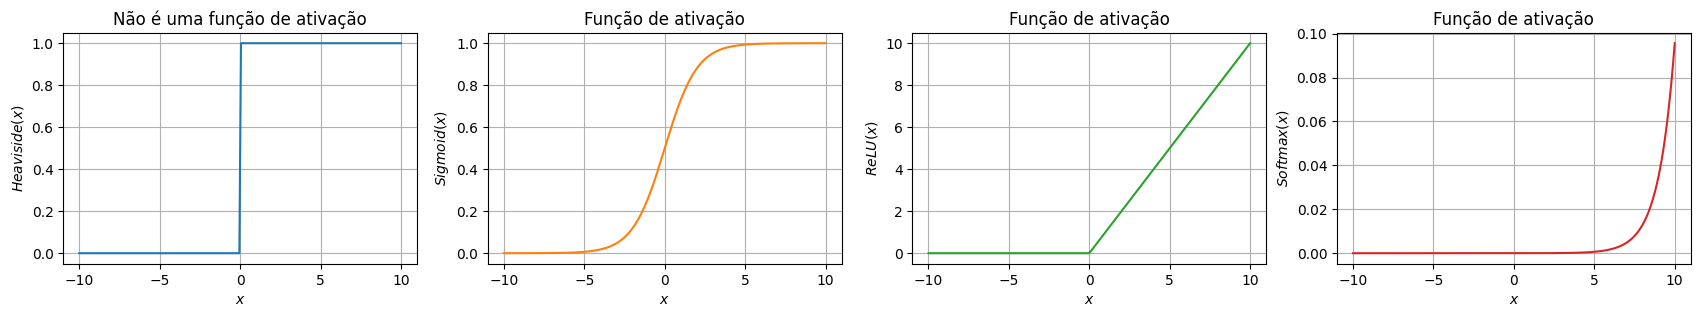

In [3]:
fig, ax = plt.subplots(1, 4, figsize=(21,3))

ax[0].plot(x, heaviside, c="tab:blue")
ax[0].set_ylabel(r'$Heaviside(x)$')

ax[1].plot(x, sigmoid, c="tab:orange")
ax[1].set_ylabel(r'$Sigmoid(x)$')

ax[2].plot(x, relu, c="tab:green")
ax[2].set_ylabel(r'$ReLU(x)$')

ax[3].plot(x, softmax, c="tab:red")
ax[3].set_ylabel(r'$Softmax(x)$')

for i in range(4):
    if i: ax[i].set_title("Função de ativação")
    else: ax[i].set_title("Não é uma função de ativação")
        
    ax[i].set_xlabel(r"$x$")
    ax[i].grid()

plt.show()

## __5. Compilação e treinamento do modelo:__
### __5.1 Função de perda:__
<font size=3>
   
Quando tratamos de modelos MLP, usualmente surge a pergunta: quais são os parâmetros internos (pesos e viés) que permitem à rede neural (NN) fazer previsões precisas?

Inicialmente, os pesos $W_l^{ij}$ e o viés $b_l^i$ são definidos aleatoriamente (geralmente utilizando a [inicialização de Xavier](https://paperswithcode.com/method/xavier-initialization)). À medida que os dados atravessam a rede neural, esses parâmetros são atualizados para otimizar a __função de perda__ $\mathcal{L}$ (_loss function_), um processo baseado no mecanismo de __descida de gradiente__ (_gradient descent_). Em um modelo supervisionado, por exemplo, uma escolha comum para a função de perda é o [Erro Quadrático Médio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio) (_mean squared error_ $-$ MSE),
$$
    \mathcal L(y,\, \bar y) = \left<(y - \bar y)^2\right> \, ,
$$
utilizado para otimizar problemas de regressão. Já quando a saída do modelo trata-se de uma distribuição de probabilidade $-$ saída de uma função de activação _softmax_ $-$ optamos pela função de perda de [Entropia Cruzada](https://pt.wikipedia.org/wiki/Entropia_cruzada) (_cross-entropy_),
$$
    \mathcal L(p,\,q) = -\sum_i p_i\,\ln q_i \, ,
$$
onde $p$ é a distribuição verdadeira, e $q$ a distribuição predita pelo modelo. Outras funções de perda podem ser encontradas na [aqui](https://keras.io/api/losses/).

Quando todo o conjunto de dados é processado pela rede neural e os parâmetros são ajustados levemente, completamos uma __época__ (_epoch_) no treinamento. Para continuar aprimorando os parâmetros, treinamos a rede por várias épocas. Mas quantas épocas são necessárias? Até que a otimização comece a saturar ou até mesmo piorar. 


### __5.2 Como os modelos são treinados:__
<font size=3>
    
Os parâmetros pesos $W_l^{ij}$ e viés $b_l^i$ quando inicializados randomicamente, são otimizados por um método de decida de gradiente. O algoritmo mais simples é conhecido como __Decida de Gradiente Estocástica__ (_Stochastic Gradient Descent_ $-$ SGD),

\begin{align}
    W_l^{ij} &\rightarrow W_l^{ij} - \eta\,\left<\vec\nabla\mathcal{L}\right>_m \, ,\\
    b_l^i &\rightarrow b_l^i - \eta\,\left<\vec\nabla\mathcal{L}\right>_m \, ,
\end{align}
onde o símbolo $\;\rightarrow\;$ significa "torna-se"; $\;\eta$ é um hiperparâmetro chamado __taxa de aprendizado__ (_learning rate_) $-$ ajusta a "velocidade" de aprendizado; e $\vec\nabla\mathcal L$ é o gradiente da função de perda $-$ nos diz quanto devemos incrementar ou reduzir os valores dos pesos e viés para otimizar o aprendizado do modelo. O símbolos $\left<\quad\right>_m$ significa a média do gradiente para cada __lote__ (_batch_) de tamanho $m$ (vamos entender a seguir). 

Em uma tarefa supervisionada, por exemplo, o conjunto de dados são dados por $(\vec x_1,\, \vec x_2,\, \dots,\, \vec x_n)$ e $(\vec y_1,\, \vec y_2,\, \dots,\, \vec y_n)$. Quando todos os $n$ pares $(\vec x_i,\, \vec y_i)$ passam pela rede (fazendo $n$ ajustes), temos _uma época_. Assim, continuamos a otimização por tantas épocas forem necessárias para satisfazer a solução da tarefa. Contudo, para acelerar o aprendizado da rede neural, ao invés de fazermos $n$ ajustes, podemos agrupar os dados em _lotes_ de modo que $um\; lote = [(\vec x_1,\, \vec x_2,\, \dots,\, \vec x_m), \, (\vec y_1,\, \vec y_2,\, \dots,\, \vec y_m)]$, onde $m$ é __tamanho do lote__ (_batch-size_). Ver ilustração abaixo.

<center>
<img src="../figs/batches.png" width="350"/>
</center>

Outros otimizadores de parâmetros podem ser encontrados [aqui](https://keras.io/api/optimizers/). 

[(Ver na prática)](2-pratica-MNIST.ipynb/#compilacao)

## __Referências:__
<font size=3>
    
- [Deep Learning with Python](https://books.google.com.br/books/about/Deep_Learning_with_Python.html?id=Yo3CAQAACAAJ&redir_esc=y);
- [Neural Networks - 3Blue1Brown](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi).
  